# Analysis of sequential DNA-MERFISH for SI14

by Pu Zheng

2022.05.30

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_7\20220616-hSTG0308_SI14_from_0601


In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

18460


# 0. fov parameters

In [5]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_7\Human_tissue\20220616-hSTG0308_SI14_from_0601',
             'save_folder':r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220616-hSTG0308_SI14_from_0601',
             'experiment_type': 'DNA',
             'num_threads': 44,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [6]:
folders, fovs = ia.io_tools.data.get_folders(fov_param['data_folder'])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 37
- Number of field of views: 205


## 1.1 fov 0-5, process with save-image

In [7]:
_overwrite = False
_fit_spots = True
_warp_images = False

#_save_images = True
bad_fov_ids = [19]

sel_fov_ids = np.arange(0,205)

for _fov_id in sel_fov_ids:
    
    if _fov_id < 5:
        _save_images = True
    else:
        _save_images = False
    
    if _fov_id in bad_fov_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 2. Process DAPI image
    dapi_im = fov._load_dapi_image()
    # 3. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_images, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 4. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_images, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 5. Process chrom
    #chrom_im = fov._load_chromosome_image()
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 37
- Number of field of views: 205
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\Human_tissue\20220616-hSTG0308_SI14_from_0601\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34U1', 'H35U2', 'H36U3'])
- 37 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220616-hSTG0308_SI14_from_0601\Conv_zscan_000.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 10.453s.
+ loading correction from file: \\10.245.74.158\Chromatin_NAS_8\Ana

## Check DAPI

<IPython.core.display.Javascript object>


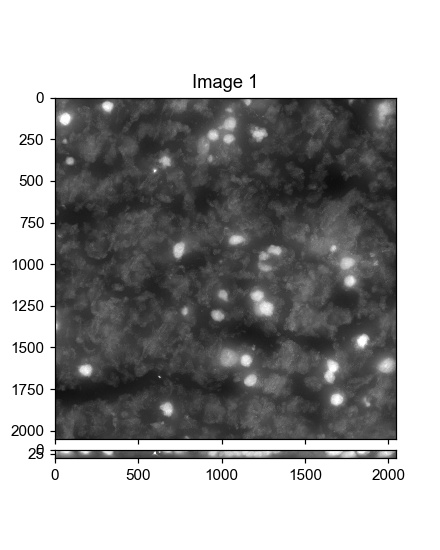

In [9]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im])

## Check images

In [27]:
# load images
fov._load_from_file('combo')

with h5py.File(fov.save_filename, 'r') as _f:
    combo_ims = _f['combo/ims'][np.arange(5,15)]
    

+ loading combo from file: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220616-hSTG0308_SI14_from_0601\Conv_zscan_000.hdf5


In [28]:
crop = ia.classes.preprocess.ImageCrop_3d([[0,50],
                                           [850,1050],
                                           [1200,1400],
                                          ])

<IPython.core.display.Javascript object>


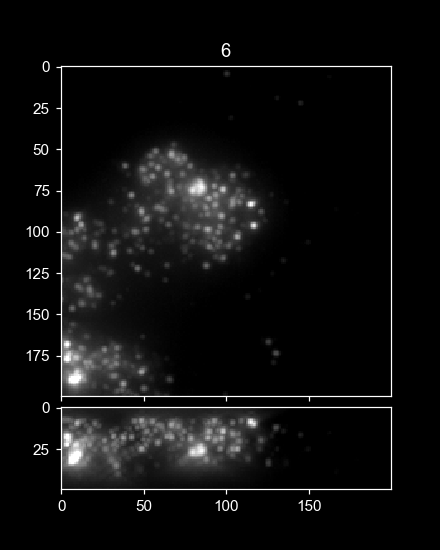

In [29]:
plt.style.use('dark_background')
visual_tools.imshow_mark_3d_v2([_im[crop.to_slices()] for _im in combo_ims], 
                               min_max_default=[2000,20000], image_names=fov.combo_ids)

## Check spot fitting

## Plot all spots

<IPython.core.display.Javascript object>


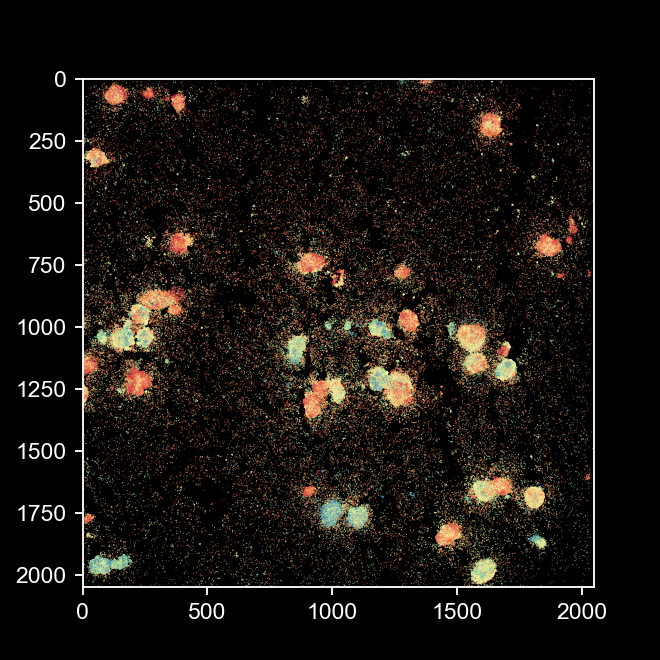

In [41]:
# scatter plot
fig, ax = plt.subplots(figsize=(4,4),dpi=150)
for _bit, _spots in zip(fov.combo_ids, fov.combo_spots_list):
    ax.scatter(_spots[:,2], _spots[:,3], s=0.2, 
               c=_spots[:,1], cmap='Spectral', linewidths=0, label=f'{_bit}',alpha=0.5)
ax.set_xlim([0,fov.shared_parameters['single_im_size'][1]])
ax.set_ylim([fov.shared_parameters['single_im_size'][2],0])
fig.show()
#fig.savefig(os.path.join(spots_figure_folder, 'Spots2D.png'), transparent=False)